<a href="https://colab.research.google.com/drive/1C4JkGSm45oWBAHF5B-N5zHRiNN48mHpM" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

# Environment Setup (10 points)

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# make sure your kaggle.json is upload to colab
!mv kaggle.json /root/.kaggle

In [1]:
!kaggle competitions download -c avazu-ctr-prediction


  0%|          | 0.00/1.19G [00:00<?, ?B/s]
  0%|          | 2.00M/1.19G [00:00<01:11, 17.8MB/s]
  1%|          | 8.00M/1.19G [00:00<00:35, 36.2MB/s]
  1%|1         | 16.0M/1.19G [00:00<00:23, 53.5MB/s]
  2%|1         | 23.0M/1.19G [00:00<00:21, 58.7MB/s]
  2%|2         | 29.0M/1.19G [00:00<00:23, 53.3MB/s]
  3%|3         | 40.0M/1.19G [00:00<00:17, 71.2MB/s]
  4%|3         | 48.0M/1.19G [00:00<00:17, 71.3MB/s]
  5%|4         | 56.0M/1.19G [00:00<00:19, 61.7MB/s]
  6%|5         | 71.0M/1.19G [00:01<00:14, 84.7MB/s]
  7%|6         | 80.0M/1.19G [00:01<00:13, 86.6MB/s]
  7%|7         | 89.0M/1.19G [00:02<00:40, 29.6MB/s]
  8%|8         | 99.0M/1.19G [00:02<00:31, 36.9MB/s]
  9%|8         | 109M/1.19G [00:02<00:25, 46.2MB/s] 
 10%|9         | 117M/1.19G [00:02<00:24, 47.7MB/s]
 10%|#         | 127M/1.19G [00:02<00:19, 57.3MB/s]
 11%|#1        | 135M/1.19G [00:02<00:18, 62.4MB/s]
 12%|#1        | 143M/1.19G [00:02<00:17, 65.2MB/s]
 13%|#2        | 153M/1.19G [00:02<00:15, 72.4MB/s]
 13%|#

In [2]:
!unzip avazu-ctr-prediction.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


# Data Preprocessing (30 points)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.gz', compression='gzip', header=0,nrows=1000000)
# drop any row has a nan value
df = df.dropna()

In [3]:
pd.set_option('display.max_columns', None)
df.head(10)

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000009e+18,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,ddd2926e,44956a24,1,2,15706,320,50,1722,0,35,-1,79
1,1.000017e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,96809ac8,711ee120,1,0,15704,320,50,1722,0,35,100084,79
2,1.000037e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,b3cf8def,8a4875bd,1,0,15704,320,50,1722,0,35,100084,79
3,1.000064e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,e8275b8f,6332421a,1,0,15706,320,50,1722,0,35,100084,79
4,1.000068e+19,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,07d7df22,a99f214a,9644d0bf,779d90c2,1,0,18993,320,50,2161,0,35,-1,157
5,1.000072e+19,0,14102100,1005,0,d6137915,bb1ef334,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,05241af0,8a4875bd,1,0,16920,320,50,1899,0,431,100077,117
6,1.000072e+19,0,14102100,1005,0,8fda644b,25d4cfcd,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,b264c159,be6db1d7,1,0,20362,320,50,2333,0,39,-1,157
7,1.000092e+19,0,14102100,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,e6f67278,be74e6fe,1,0,20632,320,50,2374,3,39,-1,23
8,1.000095e+19,1,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,37e8da74,5db079b5,1,2,15707,320,50,1722,0,35,-1,79
9,1.000126e+19,0,14102100,1002,0,84c7ba46,c4e18dd6,50e219e0,ecad2386,7801e8d9,07d7df22,c357dbff,f1ac7184,373ecbe6,0,0,21689,320,50,2496,3,167,100191,23


According to the dataset description, id is clearly unrelevent to the prediction but just for index, click is the target variables, and the rest are predictors. 

From the pandas view of the dataset, I find there are some modifications must be done to do the prediction. 

Intuitively the time of a day is actually important for ads to be clicked, and it is necessary to transfer current hour column to only hours of the day, maybe need one-hot encoding.

C1, C14, C15, C16, C17, C18, C19, C20, C21 are anonymized categorical variables, if I want to use them I have to one-hot encoded them. Personally I would not use them because there are alreadly many categorical variables and I cannot interpret anything from these predictors even if there are some correlations since they are anonymized.

site_category is more generalized than site_id and site_domain, so I may only choose site_category as a predictor from them. I must one-hot encoded it.

app_category is more generalized than app_id and app_domain, so I may only choose app_category as a predictor from them. I must one-hot encoded it.

device_type is more generalized than device_id and device_model, so I may only choose device_type as a predictor from them. I need to one-hot encoded it if the types are beyong 2.

device_conn_type is more generalized than device_ip. so I may only choose device_conn_type as a predictor from them. I must one-hot encoded it.

In summary, I will choose hour, banner_pos, site_category, app_category, device_type, and device_conn_type as predictors/features.

In [5]:
features = ['hour', 'banner_pos', 'site_category', 'app_category', 'device_type', 'device_conn_type']
# check categorical variables
for feature in features:
    print(feature + ':' + str(df[feature].unique().tolist()))

hour:[14102100, 14102101, 14102102, 14102103, 14102104, 14102105]
banner_pos:[0, 1, 4, 5, 2, 7, 3]
site_category:['28905ebd', '0569f928', 'f028772b', '50e219e0', '3e814130', '76b2941d', 'f66779e6', '335d28a8', '72722551', '75fa27f6', '110ab22d', 'c0dd3be3', 'bcf865d9', 'a818d37a', '42a36e14', 'e787de0e', '5378d028', '9ccfa2ea', '70fb0e29', 'dedf689d', '8fd0aea4']
app_category:['07d7df22', '0f2161f8', 'cef3e649', '8ded1f7a', 'f95efa07', '75d80bbe', '4ce2e9fc', 'd1327cf5', '09481d60', 'fc6fa53d', 'dc97ec06', 'a3c42688', '0f9a328c', '879c24eb', 'a86a3e89', '7113d72a', 'a7fd01ec', '4681bb9d', '8df2e842', '2281a340', '18b1e0be', '0bfbc358', '79f0b860']
device_type:[1, 0, 4, 5]
device_conn_type:[2, 0, 3, 5]


It looks like all selected features are categorical variables.

In [6]:
y = df['click'].values

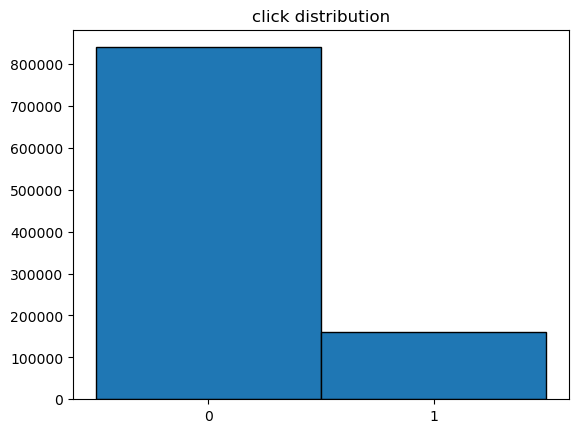

In [7]:
plt.hist(y,bins=[-.5,.5,1.5], ec="k")
plt.xticks((0,1))
plt.title('click distribution')
plt.show()

I find that the distribution of click is very imbalanced, unclick data dominate click data, which would result my model to prefer predicting unclick because unclick is statistically more likely to be correct in this dataset. The problem will be intensive when I use SGD to minimize the loss.

My approch to solve this issue is I am going to sample click and unclick data to equal number. My target is each type has 100000 data.


In [8]:
df1 = df[df['click'] == 1].sample(n=100000)
df0 = df[df['click'] == 0].sample(n=100000)
balanced_df = pd.concat([df1, df0])
y = balanced_df['click'].values

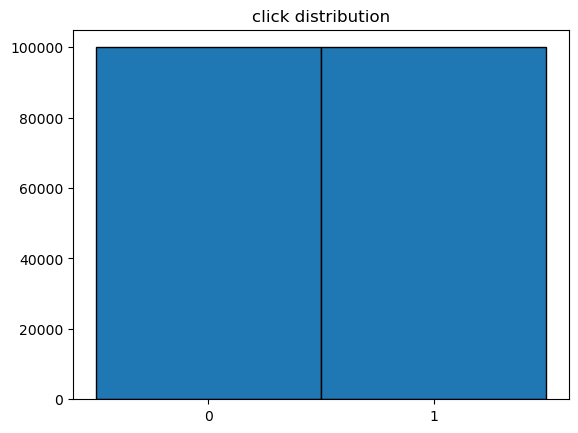

In [9]:
# now the data is balanced
plt.hist(y,bins=[-.5,.5,1.5], ec="k")
plt.xticks((0,1))
plt.title('click distribution')
plt.show()

In [10]:
# select X
X = balanced_df[features]
# change hours
X['hour'] = X['hour'].astype(str)
X['hour'] = X['hour'].str[6:8]
X['hour'] = X['hour'].astype(int)
# one hot encoding
X_dum = pd.get_dummies(data=X, columns=features)
X_dum.head(10)

C:\Users\MatthewWang\AppData\Local\Temp\ipykernel_11408\3530396614.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['hour'] = X['hour'].astype(str)
C:\Users\MatthewWang\AppData\Local\Temp\ipykernel_11408\3530396614.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['hour'] = X['hour'].str[6:8]
C:\Users\MatthewWang\AppData\Local\Temp\ipykernel_11408\3530396614.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,banner_pos_0,banner_pos_1,banner_pos_2,banner_pos_3,banner_pos_4,banner_pos_5,banner_pos_7,site_category_0569f928,site_category_110ab22d,site_category_28905ebd,site_category_335d28a8,site_category_3e814130,site_category_42a36e14,site_category_50e219e0,site_category_5378d028,site_category_70fb0e29,site_category_72722551,site_category_75fa27f6,site_category_76b2941d,site_category_8fd0aea4,site_category_a818d37a,site_category_bcf865d9,site_category_c0dd3be3,site_category_dedf689d,site_category_e787de0e,site_category_f028772b,site_category_f66779e6,app_category_07d7df22,app_category_09481d60,app_category_0bfbc358,app_category_0f2161f8,app_category_0f9a328c,app_category_18b1e0be,app_category_2281a340,app_category_4681bb9d,app_category_4ce2e9fc,app_category_7113d72a,app_category_75d80bbe,app_category_79f0b860,app_category_879c24eb,app_category_8ded1f7a,app_category_8df2e842,app_category_a3c42688,app_category_a86a3e89,app_category_cef3e649,app_category_d1327cf5,app_category_dc97ec06,app_category_f95efa07,app_category_fc6fa53d,device_type_0,device_type_1,device_type_4,device_type_5,device_conn_type_0,device_conn_type_2,device_conn_type_3,device_conn_type_5
26649,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
659512,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
856629,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
127747,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
120158,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
954819,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
60855,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
200876,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
268375,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
85982,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [11]:
# final data as numpy arrays
X = X_dum.to_numpy()
y = balanced_df['click'].to_numpy()
print('X shape:' + str(X.shape) + ', ' + 'y shape:' + str(y.shape))

X shape:(200000, 63), y shape:(200000,)


# Logistic Regression (40 points)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 15)

In [14]:
# standardization
scaler = StandardScaler()
x_train_standard = scaler.fit_transform(X_train)
x_test_standard = scaler.transform(X_test)  

I don't think standardization is useful here because all my predictors are categorical variables. Standardization is useful to avoid the effect of outliers, yet after one hot encoding there are only 1 and 0 for the predictors, I see no benefit to do standardization.

In [15]:
# high level implementation, just for me to compare accuracy = correct predictions / total number of data points
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(max_iter=1000)
logisticRegr.fit(X_train, y_train)
score = logisticRegr.score(X_test, y_test)
print('accuracy: ' + str(score))

accuracy: 0.6155833333333334


logistic regression: $\sigma(\alpha) = \frac{1}{1+e^{-\alpha}}$

For binary classification, it works to compute $p(y=1|x)=\frac{p(x|y=1)p(y=1)}{p(x|y=1)p(y=1)+p(x|y=0)p(y=0)}=\frac{1}{1+e^{-\alpha}}$

And we can also get $p(y=0|x)=1-p(y=1|x)$

where $\alpha=ln \frac{p(x|y=1)p(y=1)}{p(x|y=0)p(y=0)}$

When we use $w^t x$ as the linear activation for logistic regression model: $\hat{y} = \frac{1}{1+e^{-w^t x}}$

CE loss: 
$$L(w) = -\sum_{i=1}^{m} (y_i ln \hat{y_i} + (1-y_i) ln (1-\hat{y_i})) $$

$$= -\sum_{i=1}^{m} (y_i ln \frac{1}{1+e^{-w^t x_i}} + (1-y_i) ln (1-\frac{1}{1+e^{-w^t x_i}})) $$

$$= -\sum_{i=1}^{m} (y_i w^t x_i + ln (1+e^{w^t x_i})) $$

Gradient:
$$\nabla_w L = \sum_{i=1}^{m} ( \hat{y_i}-y_i)x_i$$

In [90]:
# initialize all beta value to 0
Beta = np.zeros(X_train.shape[1])

# use SGD to reduce loss
epochs = 800
lr = 0.01
train_size = X_train.shape[0]
losses = []

for e in range(epochs):
    # compute y_hat
    func = X@Beta
    y_hat = 1/(1 + np.exp(-func))
    # sample a data to get gradient
    rand_s = np.random.randint(train_size)
    grad_s = (y_hat[rand_s]-y_train[rand_s])*X_train[rand_s]
    # record current loss
    loss = -(y_train[rand_s]*np.log(y_hat[rand_s]) + (1-y_train[rand_s])*np.log(1-y_hat[rand_s]))
    losses.append(loss)
    # update Beta
    Beta -= lr*grad_s

In [91]:
# print accuracy = correct predictions / total number of data points
# use 0.5 as the threshold
# use test data and train data
func = X_test@Beta
y_pred = 1/(1 + np.exp(-func))
y_pred[y_pred>=0.50] = 1
y_pred[y_pred<0.50] = 0
y_diff = y_pred-y_test
acc_num = y_diff[y_diff == 0].shape[0]
test_size = X_test.shape[0]
test_accuracy = acc_num/test_size

func = X_train@Beta
y_pred = 1/(1 + np.exp(-func))
y_pred[y_pred>=0.50] = 1
y_pred[y_pred<0.50] = 0
y_diff = y_pred-y_train
acc_num = y_diff[y_diff == 0].shape[0]
train_accuracy = acc_num/train_size

print('train accuracy: ' + str(train_accuracy) + ' test accuracy: ' + str(test_accuracy))

train accuracy: 0.60175 test accuracy: 0.6023666666666667


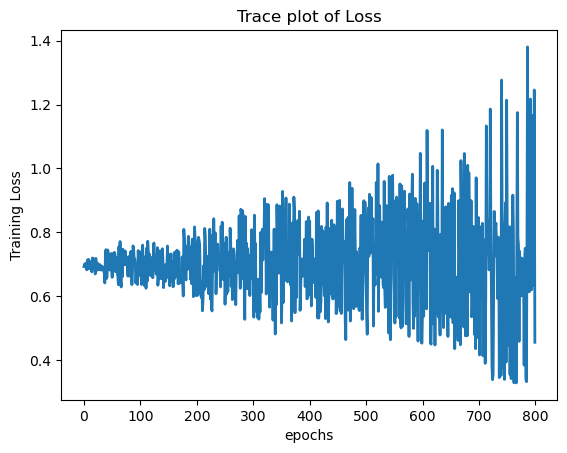

In [92]:
# plot the loss as epochs
plt.plot(losses,lw=2)
plt.title('Trace plot of Loss');
plt.xlabel('epochs')
plt.ylabel('Training Loss')
plt.show()

By looking at the accuracy between train and test data, it does not look like overfitting because the accuracy are similar. But looking at the trace plot of loss, this model is hardly to learn the features weight because the losses are highly variated.

I find some optimization methods and it looks like Adam pptimization, which add momentum and adaptive learning rate(RMSProp) during training, is the best.

I try to implement it and use it but it seems like it just makes the performance worse.

C:\Users\MatthewWang\AppData\Local\Temp\ipykernel_11408\2835976769.py:30: RuntimeWarning: overflow encountered in true_divide
  moment2 = moment2/(1-np.power(dr2,e+1))


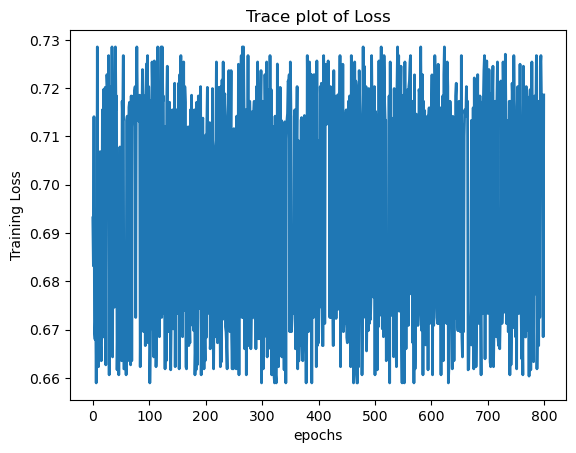

In [87]:
'''
# initialize all beta value to 0
Beta = np.zeros(X_train.shape[1])
moment1 = 0
moment2 = 0

# use SGD to reduce loss
epochs = 800
lr = 0.01
dr1 = 0.95
dr2 = 0.9999
epsil = 10e-8
train_size = X_train.shape[0]
losses = []

for e in range(epochs):
    # compute y_hat
    func = X@Beta
    y_hat = 1/(1 + np.exp(-func))
    # sample a data to get gradient
    rand_s = np.random.randint(train_size)
    grad_s = (y_hat[rand_s]-y_train[rand_s])*X_train[rand_s]
    # record current loss
    loss = -(y_train[rand_s]*np.log(y_hat[rand_s]) + (1-y_train[rand_s])*np.log(1-y_hat[rand_s]))
    losses.append(loss)
    # update first moment and second moment
    moment1 = dr1*moment1 + (1-dr1)*grad_s
    moment2 = dr2*moment2 + (1-dr2)*(np.power(grad_s,2))
    # bias correction of first moment and second moment
    moment1 = moment1/(1-np.power(dr1,e+1))
    moment2 = moment2/(1-np.power(dr2,e+1))
    # update Beta
    Beta -= (lr/(epsil + np.sqrt(moment2)))*moment1
    
# plot the loss as epochs
plt.plot(losses,lw=2)
plt.title('Trace plot of Loss');
plt.xlabel('epochs')
plt.ylabel('Training Loss')
plt.show()
'''

In [88]:
'''
# print accuracy = correct predictions / total number of data points
# use 0.5 as the threshold
# use test data and train data
func = X_test@Beta
y_pred = 1/(1 + np.exp(-func))
y_pred[y_pred>=0.50] = 1
y_pred[y_pred<0.50] = 0
y_diff = y_pred-y_test
acc_num = y_diff[y_diff == 0].shape[0]
test_size = X_test.shape[0]
test_accuracy = acc_num/test_size

func = X_train@Beta
y_pred = 1/(1 + np.exp(-func))
y_pred[y_pred>=0.50] = 1
y_pred[y_pred<0.50] = 0
y_diff = y_pred-y_train
acc_num = y_diff[y_diff == 0].shape[0]
train_accuracy = acc_num/train_size

print('train accuracy: ' + str(train_accuracy) + ' test accuracy: ' + str(test_accuracy))
'''

train accuracy: 0.5004142857142857 test accuracy: 0.49903333333333333


# Performance Results (20 points)

Precision: $P=\frac{TP}{TP+FP}$

Recall: $P=\frac{TP}{TP+FN}$

Average precision: $\sum_n (R_n - R_{n-1})P_n$

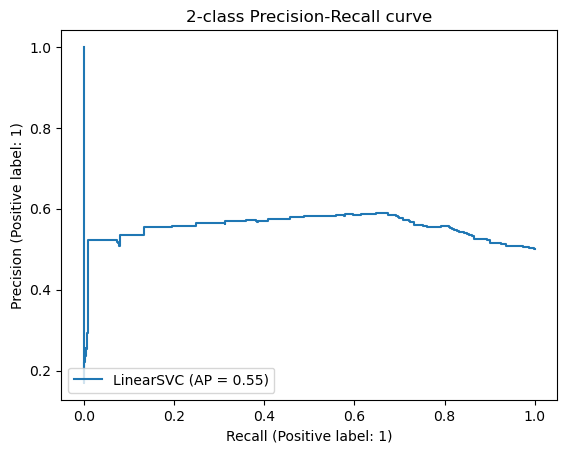

In [98]:
from sklearn.metrics import PrecisionRecallDisplay

func = X_test@Beta
y_pred = 1/(1 + np.exp(-func))

display = PrecisionRecallDisplay.from_predictions(y_test, y_pred, name="LinearSVC")
_ = display.ax_.set_title("2-class Precision-Recall curve")

Precision initially gradually increacing as Recall, and after Recall reaches around 0.7, Precision starts to drop dramatically.

So starting Recall is around 0.7 there is a tradeoff between Precision and Recall.